## Проанализируем данные итогов торговли на крипто рынке за 2022 год 

В первую очередь импортируем все необходимые библиотеки для подготовки и визуализации данных 

In [83]:
#open new data dase file
import plotly
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

Далее загрузим файл Базы Данных хранящий метрики:

In [84]:
traid_df = pd.read_csv('/Users/papaskakun/Desktop/GIT/Project_traiding/Data/Crypto_data/crypto.csv',
                          header=0, 
                         names = ['Date', 'Name',
                                  'Type', 'Open_price',
                                  'Value','Close price','Reasons', 'Step',
                                  'Step price', 'Delta','Total'],                       
                         sep = ';')
traid_data = traid_df.copy()
display(traid_data)

,Date,Name,Type,Open_price,Value,Close price,Reasons,Step,Step price,Delta,Total
0,2022-01-15,BTC,лонг,43381,1,41000,Выбило по стопу,1,"0,01","-23,81","1976,19"
1,2022-01-15,BNB,лонг,499,1,430,Выбило по стопу,1,"0,1","-6,9","1969,29"
2,2022-01-21,BTC,Шорт,41000,1,35680,Выбило ро тейку,1,"0,03","159,6","2128,89"
3,2022-01-21,ETH,шорт,3000,1,2750,Тейк,1,"0,1",25,"2153,89"
4,2022-01-21,ETH,шорт,3000,1,2486,Выбило ро тейку,1,"0,1","51,4","2205,29"
...,...,...,...,...,...,...,...,...,...,...,...
402,2022-11-08,BTC,лонг,19600,1,16955,take,1,"0,02","-52,9","1392,858974"
403,2022-11-08,BTC,лонг,19550,1,16955,take,1,"0,02","-51,9","1340,958974"
404,2022-11-11,BTC,лонг,17000,1,15803,stop,1,"0,01","-11,97","1328,988974"
405,2022-11-11,BTC,лонг,16700,1,15803,stop,1,"0,01","-8,97","1320,018974"


In [85]:
traid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         407 non-null    object
 1   Name         407 non-null    object
 2   Type         407 non-null    object
 3   Open_price   407 non-null    object
 4   Value        407 non-null    int64 
 5   Close price  407 non-null    object
 6   Reasons      407 non-null    object
 7   Step         407 non-null    int64 
 8   Step price   407 non-null    object
 9   Delta        407 non-null    object
 10  Total        407 non-null    object
dtypes: int64(2), object(9)
memory usage: 35.1+ KB


Запросив информацию о типах столбцов мы видим что многие из них имеют тип <b>"object"</b>. Нам для дадьнейшей работы необходимы значения типа <b>"float"</b> для некоторых столбцов займемся их преобразованием:

In [86]:
# replace ','
traid_data['Delta'] = traid_data['Delta'].str.replace(',', '.')
traid_data['Delta'] = traid_data['Delta'].astype('float')
# replace in Total
traid_data['Total'] = traid_data['Total'].str.replace(',', '.')
traid_data['Total'] = traid_data['Total'].astype('float')
# replace in Open
traid_data['Open_price'] = traid_data['Open_price'].str.replace(',','.')
traid_data['Open_price'] = traid_data['Open_price'].replace(' ', '')
traid_data['Open_price'] = traid_data['Open_price'].astype('float')
# replace Close 
traid_data['Close price'] = traid_data['Close price'].str.replace(',', '.')
traid_data['Close price'] = traid_data['Close price'].replace(' ', '')
traid_data['Close price'] = traid_data['Close price'].astype('float')

Приведем даты сделок к единому виду:

In [87]:
# change type of Date column to datetime format
traid_data['Date'] = pd.to_datetime(traid_data['Date'])

В числе торговых операций есть несколько сделок с активом <b>LUNA</b> по некоторым причинам случившемся с активом в мае соответсвуюшего года, нам необходимо удалить данные так как аналитически они анамальны

In [88]:
#find zero values
traid_data[traid_data['Open_price'] == 0]

,Date,Name,Type,Open_price,Value,Close price,Reasons,Step,Step price,Delta,Total
322,2022-05-14,LUNA,лонг,0.0,1,0.00008,hands,1,30524,-15.262000,2178.223013
323,2022-05-14,LUNA,лонг,0.0,1,0.00008,hands,1,60955,-16.431639,2161.791374


In [89]:
# drop data
traid_data = traid_data.drop([305,306,307,316,317,318,319,320,321,322,323])

На данном этапе стоит упамянуть что с этим активом связано еще несколько явно бессистемных сделок, но матиматически ошибки из за этого не возникает, а дальнейшую очистку (как выброс) выполним позже.

Выполнив первичную подготовку данных мы можем построить график изменения баланса в течении года:

In [90]:
# display dinamic of balance
fig = px.line(
    traid_data,
    x='Date',
    y='Total',
    #color="continent",
    #line_group="country",
    #hover_name="country",
    #line_shape="spline",
    render_mode="svg")
fig.show();

Судя по данному графику мы можем сделать следующие выводы:
* В начальном переоде наблюдается сильная валантильность, так же стоить принять во внимание что до 06   месяца(Июнь) риск не учитывался что приводило к открытию слишком больших позиций отсюда и дизбаланс между данными переодами, в дальнейшем мы будет использовать точку 6ого месяца еще не раз.
* Необходимо указать что с 06 по 08 месяц велась позиционная торговля, ошибки в которой привели к убыткам по портфелю 30% за 3 месяца и 60% от пиковых значений.
* Начиная с 09 месяца в течении нескольких последуюших удалось стабилизировать портфель путем притменения правил риск менеджмента.
*  Видим на графике в конце периода измерений снова резкий обвал значений баланса, связано это с чередой выходов по стопу, после чего были внесены финальные правки по стратегии риск менеджмента, что стабилизировало последнее.

<b>Для дальнейшей работы необходимо выделить признак месяца торгов для дальнейшей групировки.</b>

In [91]:
# creatde new sign to compose date by mounth
traid_data['MonthSale'] = traid_data['Date'].dt.month

# research info about mounth
#traid_data['MonthSale'].value_counts()

Увидив количесво сделок по месяцам, можем построить гистограмму показывающую количесво взятых контрактов:

In [92]:
# only for compare with proportion display numberts of contract per month
help_chart = traid_data.groupby('MonthSale')['Value'].count()
#display(help_chart)
#
fig = px.histogram(help_chart,
                   x=help_chart.index,
                   y = ['Value'],
                   nbins=12,
                   title="Количесво взятых контрактов по месяцам"
                   #hover_data = ['Value']
                   #labels={'x':'Number of Month', 'y':'counts of Contracts'}
                  )
fig.update_layout(hovermode="x unified") # Указываем что подскзку показываем сразу для всех элементов 
                                         # в разрезе по оси X. По мне просто бомба для этого графика, 
                                         # особенно для 4 колонки, где непонятно, есть второй сегмент 
                                         # клиентов или нету
fig.show()

Из данной гистограммы мы видим большое количесво наблюдений приходящихся на 4 месяц, это связано с попыткой увеличить интенсивность торгов путем увеличения количество торгуемых инструментов, к сожалению этот подход не привел к желаемому результату и понизил качество проведимого анализа перед входом в сделку, стоит так же заметить что торговля велась без применения стратегий риск-менеджмента, что отразилось на последующих показателях.
Так же наблюдается повышеное количесво торгов в 9 месяц (это связано с оживлением рынка после летнего застоя) 

Далее выделим из перечня торгуемых контрактов имя инструмента и подведем статистику исходя из самого популярного инструмента

In [93]:
traid_data['Name'].value_counts()

BTC      156
ETH       31
 ETH      27
ALGO      26
BNB       24
LUNA      16
DOT       11
NEAR      11
 SOL      11
MATIC     10
SOL       10
EGLD       8
LTC        8
ALPHA      6
ATOM       5
AVAX       5
ANKR       4
DYDX       3
LINA       3
XTZ        3
NULS       3
CFX        3
CHR        2
BCH        2
GRT        2
RAY        2
KSM        1
ETC        1
AAVE       1
KAVA       1
Name: Name, dtype: int64

 Проведя первичный запрос разнообразия значений стольца <b>Name</b> стало очевидно что у большинства активов имена в подходящем нам формате. Выполним небольшие преобразования, вызовим заранее приготовленные функции:

In [94]:
from outliers_lib.clear_func import change_eth
from outliers_lib.clear_func import change_sol

traid_data['NameComtract'] = traid_data['Name'].apply(change_eth)    
traid_data['NameComtract'] = traid_data['NameComtract'].apply(change_sol)

Теперь проверим последнии изменения запросив пропорции по каждому интсрументу:

In [95]:
#check proportion of contract
traid_data['NameComtract'].value_counts(normalize = True)

BTC      0.393939
ETH      0.146465
ALGO     0.065657
BNB      0.060606
SOL      0.053030
LUNA     0.040404
DOT      0.027778
NEAR     0.027778
MATIC    0.025253
EGLD     0.020202
LTC      0.020202
ALPHA    0.015152
AVAX     0.012626
ATOM     0.012626
ANKR     0.010101
DYDX     0.007576
LINA     0.007576
XTZ      0.007576
NULS     0.007576
CFX      0.007576
BCH      0.005051
CHR      0.005051
GRT      0.005051
RAY      0.005051
KSM      0.002525
ETC      0.002525
AAVE     0.002525
KAVA     0.002525
Name: NameComtract, dtype: float64

Видим что применение функции привело к желаемому результату, теперь нам необходимо выделить основные торгуемые инструменты, важные для статистики, а оставшиеся активы объединим в общую группу <b>Other</b> и составим диаграмму для наглядности:

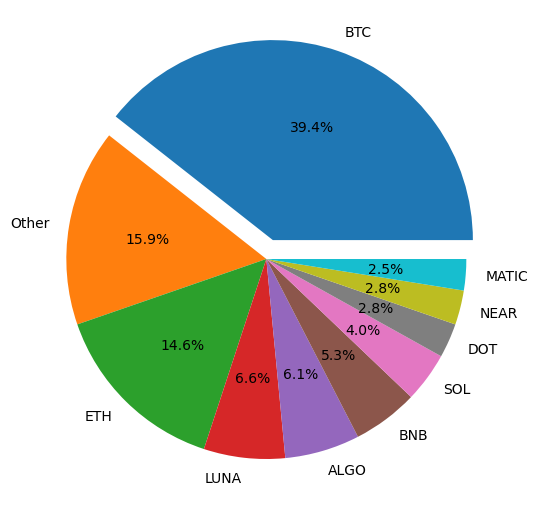

In [96]:
# create pie chart

# improving data only for correct visualization
popular_con = traid_data['NameComtract'].value_counts().nlargest(9).index
con_for_chart = traid_data['NameComtract'].apply(lambda x: x if x in popular_con else 'other')

#make chart
pie_chart = con_for_chart.value_counts(normalize = True)
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0 , 0, 1, 1])
axes.pie(
    pie_chart,
    labels= ['BTC','Other','ETH','LUNA','ALGO','BNB','SOL','DOT','NEAR','MATIC'],
    autopct='%.1f%%',
    explode = [0.1, 0,0,0,0,0,0,0,0,0]
);

Исходя из диаграммы можем заключить что самым популярным инструментом к торговле стал фьючерс Биткоин (Bitcoin) <b>BTC(38,5%)</b>

Так же мы видим как сказалась высочастотная торговля в апреле, большим количеством инструментов, 15,6% сделок "выпадают" в категорию <b>Other</b> опыт этих сделок нам не представляется возможным проанализировать так как слишком большое количесво разных малозначимых активов.

Из полученной выборки можем заключить что следующем по частоте торговался фьючерс на вторую по капитализации криптовалюту Эфир (Ethereum) <b>(ETH)</b>, это фьючерс который в среднесрочной перспективе ведет себя совершенно идентично по направлению с главной криптовалютой (BTC), часто совпаадет даже амплитуда цены в процентах. Учитывая эти факты часто торговля им приводила к повышенным убыткам, когда позиции открывались сонаправленно по обоим инструментам и рынок шел против позиции.

Следующим по значению стал фьючерс на криптовалюту LUNA торговля данным активом велась довольно оживленно до ее обвала и полного делистинга со всех бирж в конце 05 месяца (Май).

Дальнейшие активы занимают небольшой процент значений так как дальше мы увидим что начиная с периода когда высочастотная торговля завершилась (Июнь 06 месяц) торговля инструментами отличными от первых 2 фаваритов сократилась до минимума.
В дальнейшем анализе мы обратим внимание на фактор влияния конктретного инструмента на портфель

На данный момент необходимо выделить количесво открытых покупок <b>(Long)</b> и продаж <b>(Short)</b> за год:


In [97]:
traid_data['Type'].value_counts()

шорт    250
лонг    144
Шорт      2
Name: Type, dtype: int64

In [98]:
traid_data['Type'] = traid_data['Type'].str.replace('Шорт', 'шорт')

Визуализируем подготовленный признак:

In [99]:
# check that info from types of contract direction
#
# group date  to create chart

bar_chart_types = traid_data.groupby(
    ['NameComtract','Type'],
    as_index=False
).count()[['NameComtract','Type','Value']]
#display(bar_chart_types)

fig = px.bar(
    bar_chart_types,
    x = 'NameComtract',
    y = 'Value',
    color = 'Type',
    title="Отношение коротких и длинных позиций",
    text_auto='.2s'# print value on bar 
)
fig.update_layout(barmode='stack')
fig.show()

 Как мы ранее и говорили наблюдается явный перевес среди 2 основных активов, и в значительной мере перевес количесво сделок со стороны Биткоина (Bitcoin), остальные сделки несут совсем малый объем во многом даже единаждый раз, факт наличия таких сделок необходимо в будущем исключить так как торговля конкретным инструмпентом не может быть прибыльной если за год его торговали не чаще 5 раз.
 
 Далее поработаем с признаком причины выхода <b>(Reason)</b> и приведем его к единому виду при помощи заранее подгтовленной функции:

In [101]:
from outliers_lib.type_func import get_stop
from outliers_lib.type_func import get_by_hands
from outliers_lib.type_func import get_take
from outliers_lib.type_func import get_other

traid_data['Reasons'] = traid_data['Reasons'].apply(get_stop)
traid_data['Reasons'] = traid_data['Reasons'].apply(get_by_hands)
traid_data['Reasons'] = traid_data['Reasons'].apply(get_take)

# call to last improve to change last trash on type 'other'
traid_data['Reasons'] = traid_data['Reasons'].apply(get_other)
display(traid_data['Reasons'].value_counts())

Stop     200
Take     102
Hands     75
Other     19
Name: Reasons, dtype: int64

 Теперь можем визуализировать подготовленный признак:

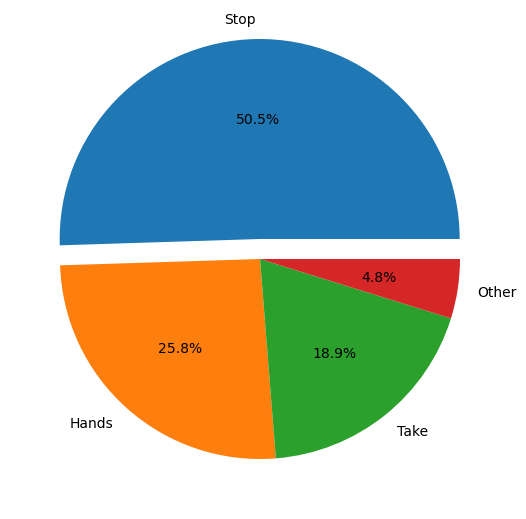

In [103]:
#create chart of reasons of closed
pie_chart = traid_data['Reasons'].value_counts(normalize = True)
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0 , 0, 1, 1])
axes.pie(
    pie_chart,
    labels= ['Stop','Hands','Take','Other'],
    autopct='%.1f%%',
    explode = [0.1, 0,0,0]
);

Видим что немногим более половины сделок было закрыто по стопу, не плохой результат если в течении года соотношение риска к прибыли сохраняется немногим более уровня 1 к 3 то такой результат должен принести прибыль в 2 раза привышающую риск на сделку, так же актуально может быть сложить все остальные показатели со стопом кроме диаметрально противоположеного (тейка), для чистоты определения "Если вышли не по лимитке (цели), то соотношение или прогнозируемая прибыль не получена"  или получена, но меньщая, что возращаясь к твердозафиксируемому фактору закрытия по стопу в 50,5%, может ухудшить показатель соотношения риска к прибыли и ввести дифицит баланса. В случае если мы принимаем стороны "либо черное - либо белое" то сделок с достижением цели (тейк) остается 18.9% а сделок не сделавших цели 81.1%. 

Данный подход стирает полутонна и позволяет абсолютно определить без каких либо условий сохранялось ли соотношение риска к прибили в течении года, можем сказать что нет, значения риска к прибыли с которым торговали в течении года (соотношение используемое при выставлении тейков и стопов) на уровне 1 к 3 принесет убытки так как немногим реже чем каждая 5 сделка делала свои цели.

Следующим пунктом сделаем признак "захваченого движения" он будет отражать процентное движение цены актива пока мы были в сделке. Стоит понимать что признак без привязки к нашей позиции. Может быть не привычно для понимания, но признак может быть отрицательным (будет означать что актив подещевел) но при этом у нас может быть прибыль в случае если позиция была открыта так же на понижение, или убытки что будет сонаправлено признаку но уменьшит наш баланс.

In [104]:
# reserch delta in persent 
#formul:
traid_data['Proportion'] = traid_data.apply(lambda x: (x['Close price']- x['Open_price']) / (x['Open_price']/ 100) , axis = 1)

#display(traid_data)

В следующем списке мы можем увидеть краткую статистическую информ апцию о признаки, но удобней увидеть общее распределение сделок относительно оси Ноль так что сразу можно переходить к диаграмме распределения:

In [105]:
traid_data['Proportion'].describe()

count    396.000000
mean       0.656534
std        5.548511
min      -17.133333
25%       -0.913198
50%        0.340617
75%        1.690274
max       30.674847
Name: Proportion, dtype: float64

In [106]:
fig = px.scatter(traid_data, x='Date', y='Proportion', trendline= 'ols')
fig.show()

Далее у нас идет краткий обзор на разные ракурсы иследования признака "захваченого движения" 

In [108]:
fig = px.box(traid_data, y='Proportion')
fig.show()


Можем судить что плотность наших пропорций находится в узком дмапозоне значений между +1,7% и - 0,9% движения цены в дальнейшем мы разберем этот фактор в проекции на временые периоды и на конкретный инструмент.
Межквартильный размах составляет уже большие движения цены между +5,3% и -4,7% движениям цены что может говорить о наличии у нас на этих уровнях либо тейков либо стопов.

Так же нельзя не заметить довольно большое количество выбросов, что может говорить как о "вредных" сделках с проскальзованием или без стопа, так и о удержании сделки с целью получения максимальной прибыли.

In [110]:
fig = px.box(traid_data,x='MonthSale', y='Proportion')
fig.show()

На данной диаграмме по месяцам мы видим распределение "захваченного движения"